importing Jupyter notebook from AStar.ipynb
importing Jupyter notebook from Grid.ipynb
importing Jupyter notebook from vehicle.ipynb
importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from GVD.ipynb
importing Jupyter notebook from HybridAStar.ipynb
importing Jupyter notebook from reedsshepp.ipynb


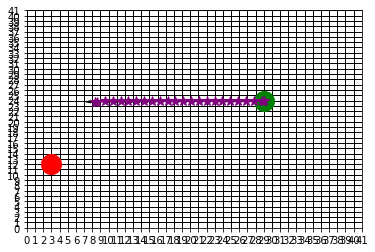

TypeError: __init__() missing 1 required positional argument: 'vehicle'

In [1]:
import import_ipynb #Allows you to import ipynb files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

import AStar
from Grid import Grid
from utils import *
from HybridAStar import HybridAStar
from vehicle import *
from Draw import Drawer

from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions(threshold=np.inf)

In [2]:
v = Vehicle((1,1))
rows, cols = 31, 31
g = Grid(rows, cols)
obstacle_list = [(0,0), (30,30), (15,15), (0,30), (30,0), (15,0), (0,15), (30,15), (15,30)]
[g.AddObstacle(obs) for obs in obstacle_list]
obs_X = [cell[0] for cell in g.obstacleCells]
obs_Y = [cell[1] for cell in g.obstacleCells]

NameError: name 'Vehicle' is not defined

In [3]:
start = VehicleState((29,24),180)
end = VehicleState((0,12),180)
path = []
hastar = HybridAStar(g, v)
path, states = hastar.run(start,end)

path_X = [cell[0] for cell in path] 
path_Y = [cell[1] for cell in path]

state_X = [state.position[0] for state in states] 
state_Y = [state.position[1] for state in states]
ori = [state.orientation for state in states]

NameError: name 'VehicleState' is not defined

In [ ]:
#PRINTER
#colormap
cmap = colors.ListedColormap(['white', 'black'])
bounds = [0,.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
#x.imshow(data,extent=[0, rows, 0, cols], cmap=cmap, norm=norm)
ax.plot(start.position[0], start.position[1], marker='.', color='green', linestyle='none', MarkerSize=40)
ax.plot(end.position[0], end.position[1], marker='.', color='red', linestyle='none', MarkerSize=40)
ax.plot(path_X, path_Y, marker='.', color='b', MarkerSize=10)
ax.plot(state_X, state_Y, marker='*', color='purple', MarkerSize=10)
#draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(0, rows, 1));
ax.set_yticks(np.arange(0, cols, 1));
for index in range(len(states)):
    x, y, a, b = state_X[index], state_Y[index], 1, np.rad2deg(ori[index])
    x1, y1 = rpoint(x,y,a,b)
    plt.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .4, width = .1,)
    
plt.rcParams['figure.figsize'] = [18, 18]
plt.show()

In [39]:
#prints turtle output of the Reeds Shepp Algorithm
import import_ipynb #Allows you to import ipynb files
from vehicle import *
from Draw import Drawer
import ReedsShepp
import random

import numpy as np
import matplotlib.pyplot as plt
v = Vehicle((1,1))
pathToFollow = []
drawer = Drawer(v, 40)
# for i in range(10):
#     pathToFollow.append((random.randint(-7,7), random.randint(-7,7), random.randint(0,359)))
#     drawer.setPositionandAngle(pathToFollow[i][:2], pathToFollow[i][2])
#     drawer.drawVectorArrow()
pathToFollow.append((.66, 7.33, 0))
drawer.setPositionandAngle(pathToFollow[0][:2], pathToFollow[0][2])
drawer.drawVectorArrow()
pathToFollow.append((8, 8.33, 180))
drawer.setPositionandAngle(pathToFollow[1][:2], pathToFollow[1][2])
drawer.drawVectorArrow()

rs = ReedsShepp.ReedsShepp(v)
drawer.setSpeed(1)
drawer.car.pensize(3)
drawer.car.pencolor('red')
for i in range(len(pathToFollow) - 1):
    optimalPath = rs.run_optimalpath(pathToFollow[i], pathToFollow[i+1])
    for path in optimalPath:
        print(path.Length)
    drawer.setPositionandAngle(pathToFollow[i][:2], pathToFollow[i][2])
    drawer.drawPath(optimalPath)  
drawer.finish()

1.4353902081395358
1.5707963267948966
5.40780669294225
0.13540611865536079


In [ ]:
#Overall Algorithm
#First the car will report any obstacles in its way
#if any, add to map w/ appropriate location
#then perform a* algorithm with global map
#do a check if there's a collision
#if so, run machine learning algorithm to change, unless there are no changes to the map
#Should only use machine learning algo IF and only IF there are changes to the map
#return path to car, use route instructions to move car appropriately

In [ ]:
#ALL MEASUREMENTS IN CM